In [1]:
import cv2
import os

In [2]:
data_path=r"C:\Users\sreekesh shimji\Documents\idtech\deep learning\plant dl project\PlantVillage"

In [3]:
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

In [4]:
label_dict=dict(zip(categories,labels)) 

print(label_dict)


{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___healthy': 3, 'Potato___Late_blight': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_healthy': 7, 'Tomato_Late_blight': 8, 'Tomato_Leaf_Mold': 9, 'Tomato_Septoria_leaf_spot': 10, 'Tomato_Spider_mites_Two_spotted_spider_mite': 11, 'Tomato__Target_Spot': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 14}


In [5]:
print(categories)
print(labels)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [6]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
            

        except Exception as e:
            print('Exception:',e)
           

Exception: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'



In [7]:
import numpy as np

data=np.array(data)/255.0
print(data.shape)
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)


(20638, 100, 100)


In [8]:
print(new_target)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [9]:
np.save('data',data)
np.save('target',new_target)

In [10]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [12]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(15,activation='softmax'))


In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.3)

In [15]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=10,callbacks=[checkpoint],validation_split=0.3)

Epoch 1/10
316/316 [==============================] - 990s 3s/step - loss: 1.9937 - accuracy: 0.3615 - val_loss: 1.4477 - val_accuracy: 0.5325
Epoch 2/10
316/316 [==============================] - 958s 3s/step - loss: 1.3534 - accuracy: 0.5693 - val_loss: 1.2496 - val_accuracy: 0.6015
Epoch 3/10
316/316 [==============================] - 805s 3s/step - loss: 1.0554 - accuracy: 0.6652 - val_loss: 1.1156 - val_accuracy: 0.6345
Epoch 4/10
316/316 [==============================] - 956s 3s/step - loss: 0.9297 - accuracy: 0.6903 - val_loss: 0.9818 - val_accuracy: 0.6717
Epoch 5/10
316/316 [==============================] - 894s 3s/step - loss: 0.8053 - accuracy: 0.7329 - val_loss: 0.9235 - val_accuracy: 0.7090
Epoch 6/10
316/316 [==============================] - 960s 3s/step - loss: 0.7011 - accuracy: 0.7663 - val_loss: 0.8655 - val_accuracy: 0.7231
Epoch 7/10
316/316 [==============================] - 903s 3s/step - loss: 0.6214 - accuracy: 0.7883 - val_loss: 1.0201 - val_accuracy: 0.6719

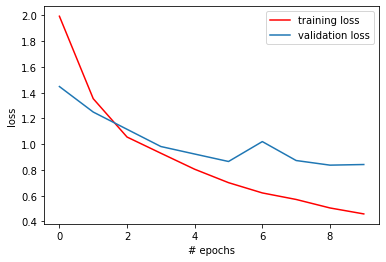

In [16]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:

#model.save("facedetector.h5")

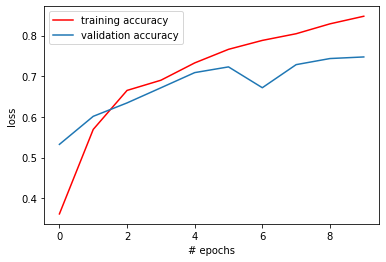

In [18]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:

model.save("plantdetect.h5")

4
[7.8501733e-04 8.8781017e-05 2.6881560e-06 2.6361488e-03 7.9024345e-01
 3.0943049e-02 1.0141671e-01 1.5722476e-06 3.2617273e-03 4.4532404e-03
 2.4329398e-02 2.0150727e-02 1.3011422e-02 3.6555331e-04 8.3105462e-03]
predicted output--- Potato___Late_blight


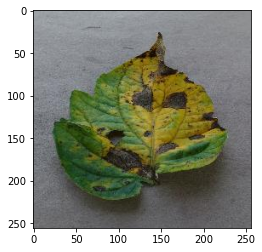

In [4]:
from keras.models import load_model
import cv2
import tensorflow as tf
from tensorflow import keras

new_model = tf.keras.models.load_model('plantdetect.h5')

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

h, w = 100, 100

img = image.load_img('0f03a09c-aa48-4d51-95e1-752c466c3742___RS_Erly.B 6413.jpg', target_size=(100,100,1))
imag = cv2.imread('0f03a09c-aa48-4d51-95e1-752c466c3742___RS_Erly.B 6413.jpg')
gray=cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
out = np.expand_dims(gray,axis=0)
final_img = out/255.0

pred = new_model.predict(final_img)
#print(pred)
max_index=np.argmax(pred[0])
print(max_index)
planttype= ('Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus')
predicted_plant=planttype[max_index]
print(pred[0])
print("predicted output---",predicted_plant)

plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB))

plt.show()
